In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from PyNeuron import LIF
from neuronpopulation import NeuronPopulation,Populations

<h1>Implement a connection between two neurons</h1>

In [2]:
def ex_time_corse(time):
    meu=0
    sigma=25
    return 500*(1/(sigma*math.sqrt(2*math.pi)))*math.exp(-((time-meu)/sigma)**2)

In [3]:
def in_time_corse(time):
    meu=0
    sigma=12
    return 250*(1/(sigma*math.sqrt(2*math.pi)))*math.exp(-((time-meu)/sigma)**2)

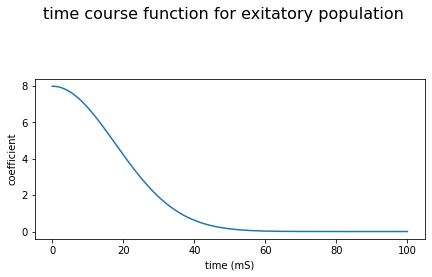

In [4]:
# time course function for exitatory population
times=np.arange(0,100,0.01)
y=np.zeros_like(times)
for i,t in enumerate(times):
    y[i]=ex_time_corse(t)
    
figure=plt.figure(figsize=(7,10))
figure.suptitle('time course function for exitatory population',fontsize=16)
ax1=figure.add_subplot(311)
ax1.plot(times,y)
ax1.set_ylabel("coefficient")
ax1.set_xlabel("time (mS)")
plt.show()

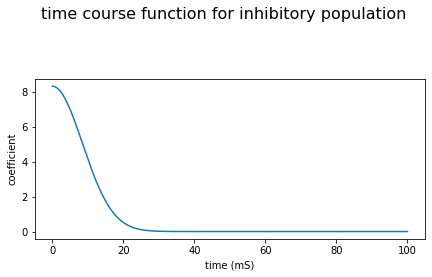

In [5]:
# time course function for inhibitory population
times=np.arange(0,100,0.01)
y=np.zeros_like(times)
for i,t in enumerate(times):
    y[i]=in_time_corse(t)
    
figure=plt.figure(figsize=(7,10))
figure.suptitle('time course function for inhibitory population',fontsize=16)
ax1=figure.add_subplot(311)
ax1.plot(times,y)
ax1.set_ylabel("coefficient")
ax1.set_xlabel("time (mS)")
plt.show()

<h3>EX-EX</h3>

In [6]:
neuron_list1=[]
connection_details1={
    'type':'fully_ex_connection',
    'j':40
}
neuron_list1.append(LIF(10+np.random.rand()*2,8+np.random.rand()*2,-79,-50,5,-68))
population1=NeuronPopulation('exitatory',connection_details1,neuron_list1,ex_time_corse)


neuron_list2=[]
connection_details2={
    'type':'fully_ex_connection',
    'j':20
}
neuron_list2.append(LIF(10+np.random.rand()*2,8+np.random.rand()*2,-79,-50,5,-68))
population2=NeuronPopulation('exitatory',connection_details2,neuron_list2,ex_time_corse)
connections=np.array([[0,45],[25,0]])

populations=Populations([population1,population2],connections,[lambda x:4000,lambda x: 4250])

threshold_list=[0.3,0.3]

time=0
time_interval=100
dt=0.03125
while time<time_interval:
    populations.single_step(time,dt,threshold_list)
    time+=dt

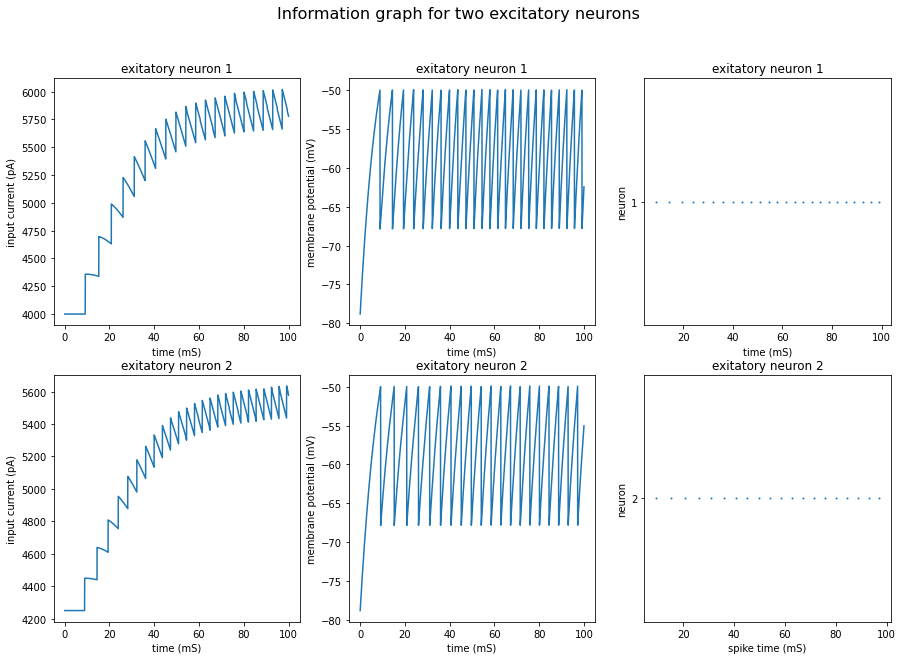

In [7]:
neuron1=population1.neuron_list[0]
neuron2=population2.neuron_list[0]

# plots of  the input current, electrical potential, and spikes of  the target neurons
figure=plt.figure(figsize=(15,10))
figure.suptitle('Information graph for two excitatory neurons',fontsize=16)

# input current
ax1=figure.add_subplot(231)
x_input_1=[]
y_input_1=[]
for l in neuron1.current:
    x_input_1.append(l[1])
    y_input_1.append(l[0])
ax1.plot(x_input_1,y_input_1)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('exitatory neuron 1')


# electrical potential
ax2=figure.add_subplot(232)
x_voltage_1=[]
y_voltage_1=[]
for l in neuron1.history:
    x_voltage_1.append(l[1])
    y_voltage_1.append(l[0])
ax2.plot(x_voltage_1,y_voltage_1)
ax2.set_ylabel("membrane potential (mV)")
ax2.set_xlabel("time (mS)")
ax2.set_title('exitatory neuron 1')

# spikes
ax3=figure.add_subplot(233)
ex1=np.chararray((len(neuron1.spikes)))
ex1.fill('1')
ax3.scatter(neuron1.spikes,ex1,s=[1])
ax3.set_ylabel("neuron")
ax3.set_xlabel("time (mS)")
ax3.set_title('exitatory neuron 1')


# input current
ax4=figure.add_subplot(234)
x_input_2=[]
y_input_2=[]
for l in neuron2.current:
    x_input_2.append(l[1])
    y_input_2.append(l[0])
ax4.plot(x_input_2,y_input_2)
ax4.set_ylabel("input current (pA)")
ax4.set_xlabel("time (mS)")
ax4.set_title('exitatory neuron 2')


# electrical potential
ax5=figure.add_subplot(235)
x_voltage_2=[]
y_voltage_2=[]
for l in neuron2.history:
    x_voltage_2.append(l[1])
    y_voltage_2.append(l[0])
ax5.plot(x_voltage_2,y_voltage_2)
ax5.set_ylabel("membrane potential (mV)")
ax5.set_xlabel("time (mS)")
ax5.set_title('exitatory neuron 2')

# spikes
ax6=figure.add_subplot(236)
ex2=np.chararray((len(neuron2.spikes)))
ex2.fill('2')
ax6.scatter(neuron2.spikes,ex2,s=[1])
ax6.set_ylabel("neuron")
ax6.set_xlabel("spike time (mS)")
ax6.set_title('exitatory neuron 2')
plt.show()

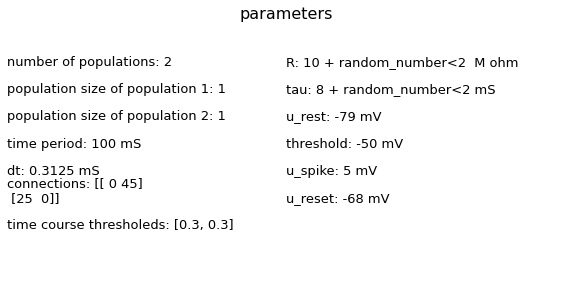

In [8]:
figure=plt.figure(figsize=(10,5))
# parameters
ax1=figure.add_subplot(111)
ax1.text(0,0.85,'number of populations: 2',fontsize=13)
ax1.text(0,0.75,'population size of population 1: 1',fontsize=13)
ax1.text(0,0.65,'population size of population 2: 1',fontsize=13)
ax1.text(0,0.55,'time period: 100 mS',fontsize=13)
ax1.text(0,0.45,'dt: 0.3125 mS',fontsize=13)
ax1.text(0,0.35,f'connections: {connections}',fontsize=13)
ax1.text(0,0.25,f'time course thresholeds: {threshold_list}',fontsize=13)
ax1.text(0.5,0.85,'R: 10 + random_number<2  M ohm',fontsize=13)
ax1.text(0.5,0.75,'tau: 8 + random_number<2 mS',fontsize=13)
ax1.text(0.5,0.65,'u_rest: -79 mV',fontsize=13)
ax1.text(0.5,0.55,'threshold: -50 mV',fontsize=13)
ax1.text(0.5,0.45,'u_spike: 5 mV',fontsize=13)
ax1.text(0.5,0.35,'u_reset: -68 mV',fontsize=13)
ax1.set_title('parameters',fontsize=16)
ax1.set_axis_off()

<h3>EX-IN</h3>

In [9]:
neuron_list1=[]
connection_details1={
    'type':'fully_ex_connection',
    'j':40
}
neuron_list1.append(LIF(10+np.random.rand()*2,8+np.random.rand()*2,-79,-50,5,-68))
population1=NeuronPopulation('exitatory',connection_details1,neuron_list1,ex_time_corse)


neuron_list2=[]
connection_details2={
    'type':'fully_ex_connection',
    'j':20
}
neuron_list2.append(LIF(10+np.random.rand()*2,8+np.random.rand()*2,-79,-50,5,-68))
population2=NeuronPopulation('inhibitory',connection_details2,neuron_list2,in_time_corse)
connections=np.array([[0,-25],[20,0]])

populations=Populations([population1,population2],connections,[lambda x:4000,lambda x: 4250])

threshold_list=[0.3,0.3]

time=0
time_interval=100
dt=0.03125
while time<time_interval:
    populations.single_step(time,dt,threshold_list)
    time+=dt

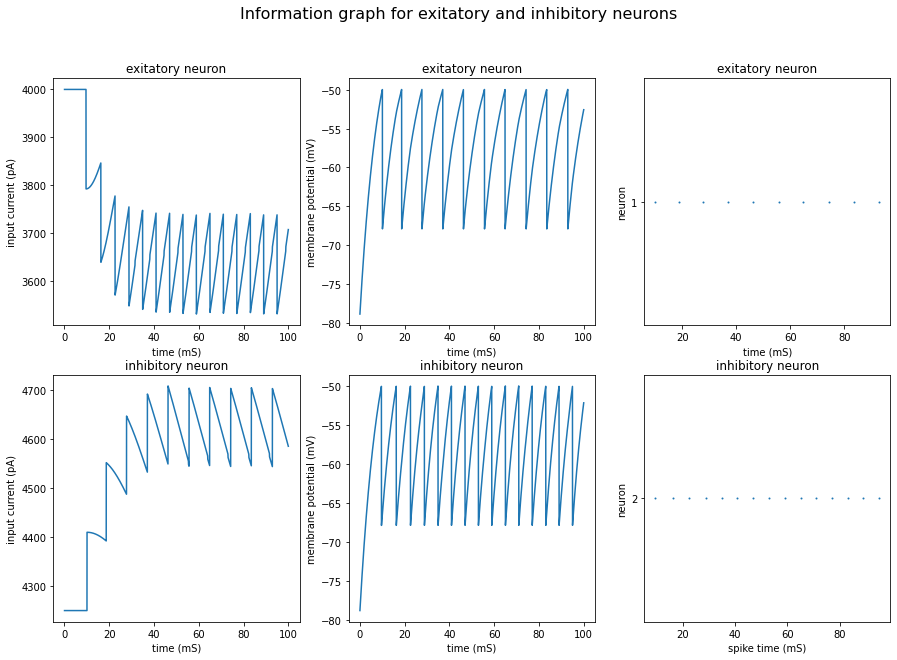

In [10]:
neuron1=population1.neuron_list[0]
neuron2=population2.neuron_list[0]

# plots of  the input current, electrical potential, and spikes of  the target neurons
figure=plt.figure(figsize=(15,10))
figure.suptitle('Information graph for exitatory and inhibitory neurons',fontsize=16)

# input current
ax1=figure.add_subplot(231)
x_input_1=[]
y_input_1=[]
for l in neuron1.current:
    x_input_1.append(l[1])
    y_input_1.append(l[0])
ax1.plot(x_input_1,y_input_1)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('exitatory neuron')


# electrical potential
ax2=figure.add_subplot(232)
x_voltage_1=[]
y_voltage_1=[]
for l in neuron1.history:
    x_voltage_1.append(l[1])
    y_voltage_1.append(l[0])
ax2.plot(x_voltage_1,y_voltage_1)
ax2.set_ylabel("membrane potential (mV)")
ax2.set_xlabel("time (mS)")
ax2.set_title('exitatory neuron')

# spikes
ax3=figure.add_subplot(233)
ex1=np.chararray((len(neuron1.spikes)))
ex1.fill('1')
ax3.scatter(neuron1.spikes,ex1,s=[1])
ax3.set_ylabel("neuron")
ax3.set_xlabel("time (mS)")
ax3.set_title('exitatory neuron')


# input current
ax4=figure.add_subplot(234)
x_input_2=[]
y_input_2=[]
for l in neuron2.current:
    x_input_2.append(l[1])
    y_input_2.append(l[0])
ax4.plot(x_input_2,y_input_2)
ax4.set_ylabel("input current (pA)")
ax4.set_xlabel("time (mS)")
ax4.set_title('inhibitory neuron')


# electrical potential
ax5=figure.add_subplot(235)
x_voltage_2=[]
y_voltage_2=[]
for l in neuron2.history:
    x_voltage_2.append(l[1])
    y_voltage_2.append(l[0])
ax5.plot(x_voltage_2,y_voltage_2)
ax5.set_ylabel("membrane potential (mV)")
ax5.set_xlabel("time (mS)")
ax5.set_title('inhibitory neuron')

# spikes
ax6=figure.add_subplot(236)
ex2=np.chararray((len(neuron2.spikes)))
ex2.fill('2')
ax6.scatter(neuron2.spikes,ex2,s=[1])
ax6.set_ylabel("neuron")
ax6.set_xlabel("spike time (mS)")
ax6.set_title('inhibitory neuron')
plt.show()

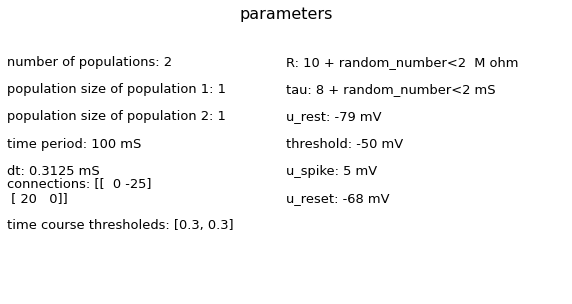

In [11]:
figure=plt.figure(figsize=(10,5))
# parameters
ax1=figure.add_subplot(111)
ax1.text(0,0.85,'number of populations: 2',fontsize=13)
ax1.text(0,0.75,'population size of population 1: 1',fontsize=13)
ax1.text(0,0.65,'population size of population 2: 1',fontsize=13)
ax1.text(0,0.55,'time period: 100 mS',fontsize=13)
ax1.text(0,0.45,'dt: 0.3125 mS',fontsize=13)
ax1.text(0,0.35,f'connections: {connections}',fontsize=13)
ax1.text(0,0.25,f'time course thresholeds: {threshold_list}',fontsize=13)
ax1.text(0.5,0.85,'R: 10 + random_number<2  M ohm',fontsize=13)
ax1.text(0.5,0.75,'tau: 8 + random_number<2 mS',fontsize=13)
ax1.text(0.5,0.65,'u_rest: -79 mV',fontsize=13)
ax1.text(0.5,0.55,'threshold: -50 mV',fontsize=13)
ax1.text(0.5,0.45,'u_spike: 5 mV',fontsize=13)
ax1.text(0.5,0.35,'u_reset: -68 mV',fontsize=13)
ax1.set_title('parameters',fontsize=16)
ax1.set_axis_off()

<h3>IN-IN</h3>

In [4]:
neuron_list1=[]
connection_details1={
    'type':'fully_ex_connection',
    'j':40
}
neuron_list1.append(LIF(10+np.random.rand()*2,8+np.random.rand()*2,-79,-50,5,-68))
population1=NeuronPopulation('inhibitory',connection_details1,neuron_list1,in_time_corse)


neuron_list2=[]
connection_details2={
    'type':'fully_ex_connection',
    'j':20
}
neuron_list2.append(LIF(10+np.random.rand()*2,8+np.random.rand()*2,-79,-50,5,-68))
population2=NeuronPopulation('inhibitory',connection_details2,neuron_list2,in_time_corse)
connections=np.array([[0,-25],[-20,0]])

populations=Populations([population1,population2],connections,[lambda x:4000,lambda x: 4250])

threshold_list=[0.3,0.3]

time=0
time_interval=100
dt=0.03125
while time<time_interval:
    populations.single_step(time,dt,threshold_list)
    time+=dt

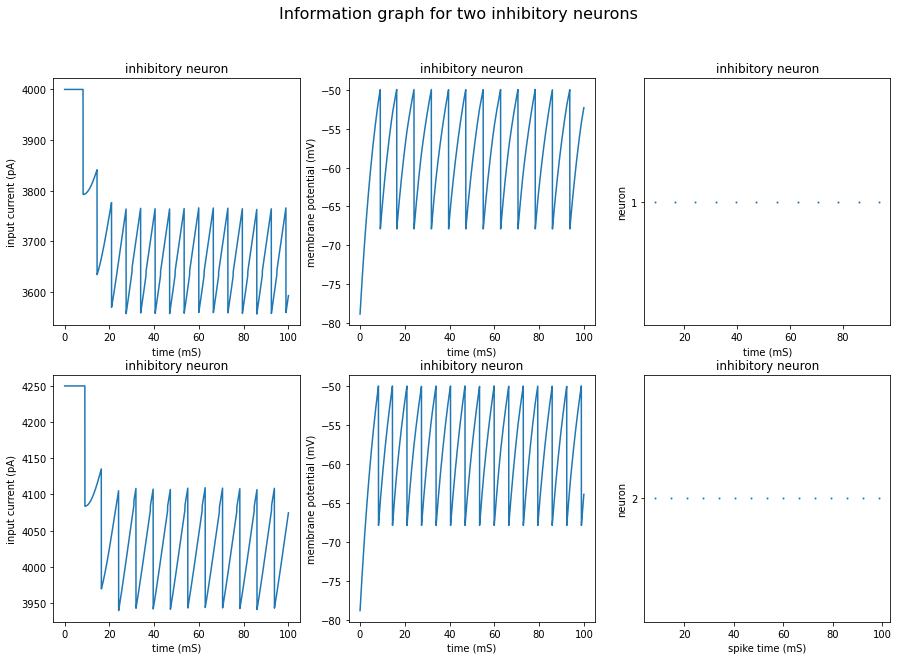

In [5]:
neuron1=population1.neuron_list[0]
neuron2=population2.neuron_list[0]

# plots of  the input current, electrical potential, and spikes of  the target neurons
figure=plt.figure(figsize=(15,10))
figure.suptitle('Information graph for two inhibitory neurons',fontsize=16)

# input current
ax1=figure.add_subplot(231)
x_input_1=[]
y_input_1=[]
for l in neuron1.current:
    x_input_1.append(l[1])
    y_input_1.append(l[0])
ax1.plot(x_input_1,y_input_1)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('inhibitory neuron')


# electrical potential
ax2=figure.add_subplot(232)
x_voltage_1=[]
y_voltage_1=[]
for l in neuron1.history:
    x_voltage_1.append(l[1])
    y_voltage_1.append(l[0])
ax2.plot(x_voltage_1,y_voltage_1)
ax2.set_ylabel("membrane potential (mV)")
ax2.set_xlabel("time (mS)")
ax2.set_title('inhibitory neuron')

# spikes
ax3=figure.add_subplot(233)
ex1=np.chararray((len(neuron1.spikes)))
ex1.fill('1')
ax3.scatter(neuron1.spikes,ex1,s=[1])
ax3.set_ylabel("neuron")
ax3.set_xlabel("time (mS)")
ax3.set_title('inhibitory neuron')


# input current
ax4=figure.add_subplot(234)
x_input_2=[]
y_input_2=[]
for l in neuron2.current:
    x_input_2.append(l[1])
    y_input_2.append(l[0])
ax4.plot(x_input_2,y_input_2)
ax4.set_ylabel("input current (pA)")
ax4.set_xlabel("time (mS)")
ax4.set_title('inhibitory neuron')


# electrical potential
ax5=figure.add_subplot(235)
x_voltage_2=[]
y_voltage_2=[]
for l in neuron2.history:
    x_voltage_2.append(l[1])
    y_voltage_2.append(l[0])
ax5.plot(x_voltage_2,y_voltage_2)
ax5.set_ylabel("membrane potential (mV)")
ax5.set_xlabel("time (mS)")
ax5.set_title('inhibitory neuron')

# spikes
ax6=figure.add_subplot(236)
ex2=np.chararray((len(neuron2.spikes)))
ex2.fill('2')
ax6.scatter(neuron2.spikes,ex2,s=[1])
ax6.set_ylabel("neuron")
ax6.set_xlabel("spike time (mS)")
ax6.set_title('inhibitory neuron')
plt.show()

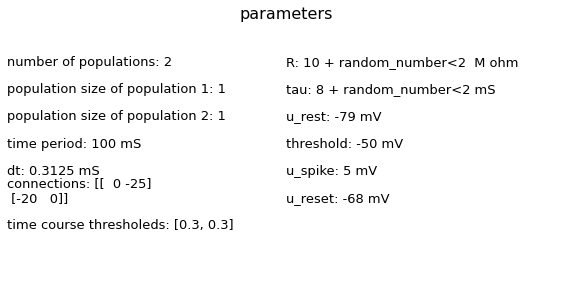

In [6]:
figure=plt.figure(figsize=(10,5))
# parameters
ax1=figure.add_subplot(111)
ax1.text(0,0.85,'number of populations: 2',fontsize=13)
ax1.text(0,0.75,'population size of population 1: 1',fontsize=13)
ax1.text(0,0.65,'population size of population 2: 1',fontsize=13)
ax1.text(0,0.55,'time period: 100 mS',fontsize=13)
ax1.text(0,0.45,'dt: 0.3125 mS',fontsize=13)
ax1.text(0,0.35,f'connections: {connections}',fontsize=13)
ax1.text(0,0.25,f'time course thresholeds: {threshold_list}',fontsize=13)
ax1.text(0.5,0.85,'R: 10 + random_number<2  M ohm',fontsize=13)
ax1.text(0.5,0.75,'tau: 8 + random_number<2 mS',fontsize=13)
ax1.text(0.5,0.65,'u_rest: -79 mV',fontsize=13)
ax1.text(0.5,0.55,'threshold: -50 mV',fontsize=13)
ax1.text(0.5,0.45,'u_spike: 5 mV',fontsize=13)
ax1.text(0.5,0.35,'u_reset: -68 mV',fontsize=13)
ax1.set_title('parameters',fontsize=16)
ax1.set_axis_off()

<h3>Implementation of neural populations</h3>

In [13]:
neuron_list1=[]
connection_details1={
    'type':'fully_connection',
    'j':10
}
for idx in range(8):
    neuron_list1.append(LIF(10+np.random.rand()*2,8+np.random.rand()*2,-79,-50,5,-68))
population1=NeuronPopulation('exitatory',connection_details1,neuron_list1,ex_time_corse)


neuron_list2=[]
connection_details2={
    'type':'fully_connection',
    'j':6
}
for idx in range(2):
    neuron_list2.append(LIF(10+np.random.rand()*2,3+np.random.rand()*2,-79,-50,5,-68))
population2=NeuronPopulation('inhibitory',connection_details2,neuron_list2,in_time_corse)
connections=np.array([[0,-1],[25,0]])

populations=Populations([population1,population2],connections,[lambda x:4750,lambda x: 4000])

threshold_list=[3,3]

time=0
time_interval=50
dt=0.03125
while time<time_interval:
    populations.single_step(time,dt,threshold_list)
    time+=dt

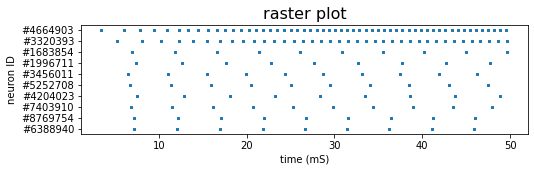

In [14]:
# raster plot
figure=plt.figure(figsize=(8,2))

# input current
ax1=figure.add_subplot(111)
x,y=populations.raster_plot_data()
ax1.scatter(x,y,marker='s',s=4)
ax1.set_ylabel("neuron ID")
ax1.set_xlabel("time (mS)")
ax1.set_title('raster plot',fontsize=16)

plt.show()

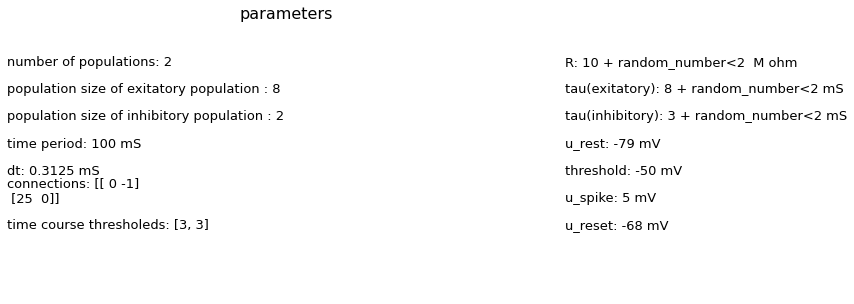

In [15]:
figure=plt.figure(figsize=(10,5))
# parameters
ax1=figure.add_subplot(111)
ax1.text(0,0.85,'number of populations: 2',fontsize=13)
ax1.text(0,0.75,'population size of exitatory population : 8',fontsize=13)
ax1.text(0,0.65,'population size of inhibitory population : 2',fontsize=13)
ax1.text(0,0.55,'time period: 100 mS',fontsize=13)
ax1.text(0,0.45,'dt: 0.3125 mS',fontsize=13)
ax1.text(0,0.35,f'connections: {connections}',fontsize=13)
ax1.text(0,0.25,f'time course thresholeds: {threshold_list}',fontsize=13)
ax1.text(1,0.85,'R: 10 + random_number<2  M ohm',fontsize=13)
ax1.text(1,0.75,'tau(exitatory): 8 + random_number<2 mS',fontsize=13)
ax1.text(1,0.65,'tau(inhibitory): 3 + random_number<2 mS',fontsize=13)
ax1.text(1,0.55,'u_rest: -79 mV',fontsize=13)
ax1.text(1,0.45,'threshold: -50 mV',fontsize=13)
ax1.text(1,0.35,'u_spike: 5 mV',fontsize=13)
ax1.text(1,0.25,'u_reset: -68 mV',fontsize=13)
ax1.set_title('parameters',fontsize=16)
ax1.set_axis_off()

<h3>Implementation of network of neural populations</h3>

In [17]:
neuron_list1=[]
connection_details1={
    'type':'fully_connection',
    'j':10
}
for idx in range(10):
    neuron_list1.append(LIF(10+np.random.rand()*2,8+np.random.rand()*2,-79,-50,5,-68))
population1=NeuronPopulation('exitatory',connection_details1,neuron_list1,ex_time_corse)


neuron_list2=[]
connection_details2={
    'type':'fully_connection',
    'j':6
}
for idx in range(10):
    neuron_list2.append(LIF(10+np.random.rand()*2,12+np.random.rand()*2,-79,-50,5,-68))
population2=NeuronPopulation('exitatory',connection_details2,neuron_list2,ex_time_corse)

neuron_list3=[]
connection_details3={
    'type':'fully_connection',
    'j':8
}
for idx in range(10):
    neuron_list3.append(LIF(10+np.random.rand()*2,3+np.random.rand()*2,-79,-50,5,-68))
population3=NeuronPopulation('inhibitory',connection_details3,neuron_list3,in_time_corse)


connections=np.array([[6,7,-1],[6,7,-2],[11,12,0]])

populations=Populations([population1,population2,population3],connections,[lambda x:4750,lambda x:4250,lambda x: 4000])

threshold_list=[3,3,3]

time=0
time_interval=50
dt=0.03125
while time<time_interval:
    populations.single_step(time,dt,threshold_list)
    time+=dt

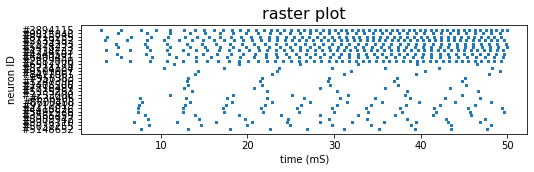

In [18]:
# raster plot
figure=plt.figure(figsize=(8,2))

# input current
ax1=figure.add_subplot(111)
x,y=populations.raster_plot_data()
ax1.scatter(x,y,marker='s',s=4)
ax1.set_ylabel("neuron ID")
ax1.set_xlabel("time (mS)")
ax1.set_title('raster plot',fontsize=16)

plt.show()

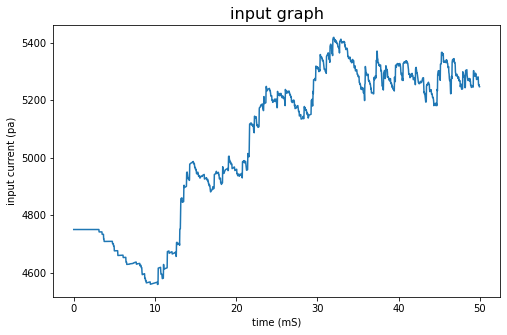

In [22]:
# raster plot
figure=plt.figure(figsize=(8,5))

# input current
ax1=figure.add_subplot(111)
x=[]
y=[]
time=0
dt=0.03125
for l in populations.inputs:
    x.append(time)
    y.append(l[0])
    time+=dt
ax1.plot(x,y)
ax1.set_ylabel("input current (pa)")
ax1.set_xlabel("time (mS)")
ax1.set_title('input graph',fontsize=16)

plt.show()